1. Import Necessary Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

2. Load and Preprocess the Data

In [2]:
# Load MNIST dataset from openml
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist['data'], mnist['target']

# Convert labels to integers
y = y.astype(np.int8)

# Normalize pixel values to the range [0, 1]
X = X / 255.0

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

3. Train the Logistic Regression Model

In [3]:
# Initialize and train the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, solver='lbfgs')
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

4. Evaluate the Model

In [4]:
# Predict on the test set
y_pred = log_reg.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 92.00%


In [5]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Confusion Matrix:
[[1298    1    6    0    3   11   12    4    6    2]
 [   0 1548    6   10    3   12    0    4   15    2]
 [   5   19 1234   20   15   10   20   18   29   10]
 [   6   10   30 1281    1   39    7   18   23   18]
 [   6    2    5    5 1203    5   10    8    8   43]
 [   3   11    8   42   13 1120   22    4   35   15]
 [   6    5   19    1   14   16 1331    1    3    0]
 [   6    4   27    3   10    7    0 1415    1   30]
 [  10   26   13   48    6   44    9    9 1173   19]
 [   8   11    6   13   36    7    0   47   15 1277]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1343
           1       0.95      0.97      0.96      1600
           2       0.91      0.89      0.90      1380
           3       0.90      0.89      0.90      1433
           4       0.92      0.93      0.93      1295
           5       0.88      0.88      0.88      1273
           6       0.94      0.95      0.95      

5. Visualize Some Results 

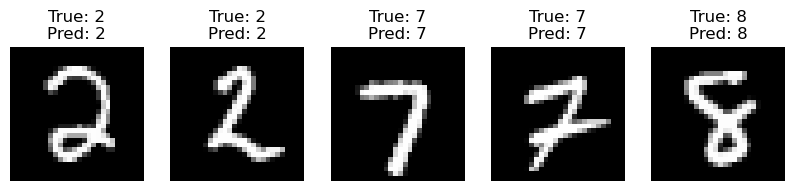

In [6]:
# Function to plot some of the test images with predicted labels
def plot_images(images, labels, predictions, num_images=5):
    plt.figure(figsize=(10, 5))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i].reshape(28, 28), cmap='gray')
        plt.title(f"True: {labels[i]}\nPred: {predictions[i]}")
        plt.axis('off')
    plt.show()

# Ensure X_test, y_test, and y_pred are numpy arrays
X_test = np.array(X_test)
y_test = np.array(y_test)
y_pred = np.array(y_pred)

# Select some random indices for visualization
indices = np.random.choice(len(X_test), size=5, replace=False)

# Use the function to plot the selected images
plot_images(X_test[indices], y_test[indices], y_pred[indices])